In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from stat_func import pearson_r, draw_bs_pairs_linreg

In [2]:
sns.set_style('darkgrid')

In [3]:
with open('fertility.pkl', 'rb') as f:
    fertility = pkl.load(f)
with open('illiteracy.pkl', 'rb') as f:
    illiteracy = pkl.load(f)

### Correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world

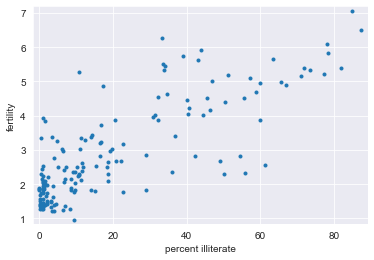

Pearson correlation: 0.8041324026815346


In [4]:
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')
plt.show()
print('Pearson correlation:', pearson_r(illiteracy, fertility))

### Perform a linear regression

In [5]:
a, b = np.polyfit(illiteracy, fertility, 1)
x = np.array([0,100])
y = a * x + b

In [6]:
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

slope = 0.049798548090634144 children per woman / percent illiterate
intercept = 1.8880506106365575 children per woman


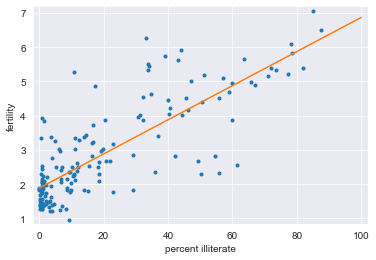

In [7]:
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')
plt.plot(x, y)

### Plot the function that is being optimized, the RSS, versus the slope parameter a

In [8]:
a_vals = np.linspace(0, 0.1, 200)
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

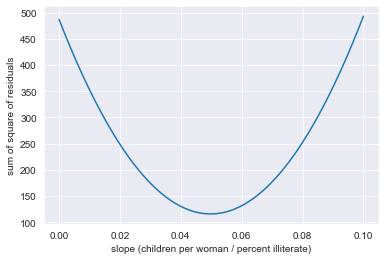

In [9]:
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')
plt.show()

The minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value that got when performing the regression.

### Perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data and report the 95% confidence interval of the slope.

In [13]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

[0.04412138 0.05582322]


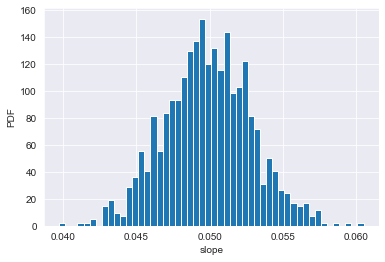

In [14]:
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

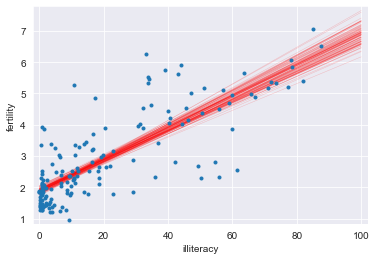

In [15]:
x = np.array([0,100])
for i in range(100):
    plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.xlabel('illiteracy')
plt.ylabel('fertility')
plt.margins(0.02)
plt.show()